# Notebook Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [2]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

VOCAB_SIZE = 2500

## Load the Data

In [3]:
# features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter= ' ')
# target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter= ' ')
# Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter= ' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter= ' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter= ' ')

# Calculating the joint prbability

### The Dot Product

In [4]:
a = np.array([1, 2, 3])
c= np.array([[2, 4, 6], [3, 0, 1], [1, 4, 7]])
print(a.dot(c))
a.dot(c).shape

[11 16 29]


(3,)

In [5]:
print(X_test.dot(prob_token_spam))
X_test.dot(prob_token_spam).shape

[0.4138841  0.14229164 0.11973853 ... 0.58905857 0.08858928 0.26468023]


(1724,)

## Set the Prior

$$P(Spam \, | \, X) = \frac{P(X \, | \, Spam) \, P(Spam)}{P(X)}$$

In [6]:
PROB_SPAM = 0.3112

In [7]:
np.log(prob_token_spam)

array([ -4.42125618,  -5.26534377,  -5.0003531 , ..., -10.16104909,
        -9.16252026, -12.10695924])

## Joint probability in log format

In [8]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM)
joint_log_spam[:5]

array([ -2.12834827,  -4.98413969,   4.43830504, -19.91523553,
        -5.84388144])

$$P(ham \, | \, X) = \frac{P(X \, | \, ham) \,(1 - P(spam))}{P(X)}$$

In [9]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1 - PROB_SPAM)
joint_log_ham[:5]

array([-45.55714932,  -8.97210438, -24.09218541, -51.53728796,
       -45.12784576])

In [10]:
joint_log_spam.size

1724

# Making Predictions

### Checking for the higher joint probability

$$P(Spam \, | \, X) > P(Ham \, | \, X)$$
<br>
<center>OR</center>
<br>
$$P(Spam \, | \, X) < P(Ham \, | \, X)$$

In [11]:
prediction = joint_log_spam > joint_log_ham
prediction[-5:]*1

array([1, 0, 0, 0, 0])

In [12]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

### Simplify

$$P(X \, | \, Spam)P(Spam) \,  ≠ \, \frac{P(X \, | \, Spam)P(Spam)}{P(X)} $$

In [13]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1 - PROB_SPAM)

# Matrices and Evaluation

### Accuracy

In [14]:
correct_doc = (y_test == prediction).sum()
print('docs classified correctly :',correct_doc)
numdocs_wrong = X_test.shape[0] - correct_doc
print('docs classified incorrectly :',numdocs_wrong)

docs classified correctly : 1600
docs classified incorrectly : 124


In [15]:
# Accuracy
accuracy = correct_doc / len(X_test)
accuracy

0.9280742459396751

In [16]:
fraction_wrong = numdocs_wrong/len(X_test)
print('Fraction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('Fraction classified incorrectly is {:.2%}'.format(1 - fraction_wrong))

Fraction classified incorrectly is 7.19%
Fraction classified incorrectly is 92.81%


## Visualising the results

In [17]:
# chart style info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | ham)'

linedata = np.linspace(start=-14000, stop=1, num=1000)

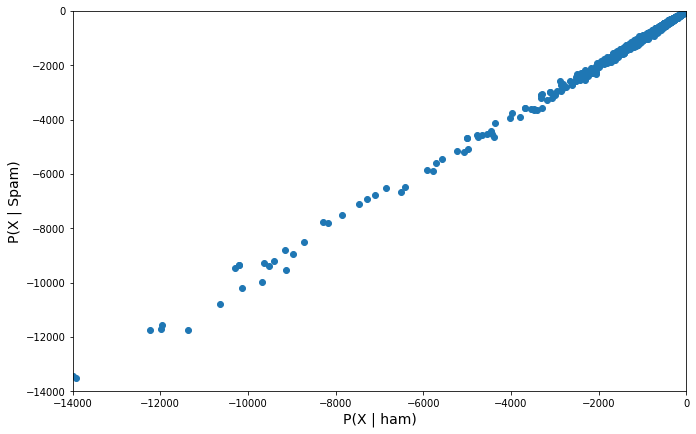

In [18]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, size= 14)
plt.ylabel(yaxis_label, size= 14)

#set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam)
plt.show()

## The decision boundary

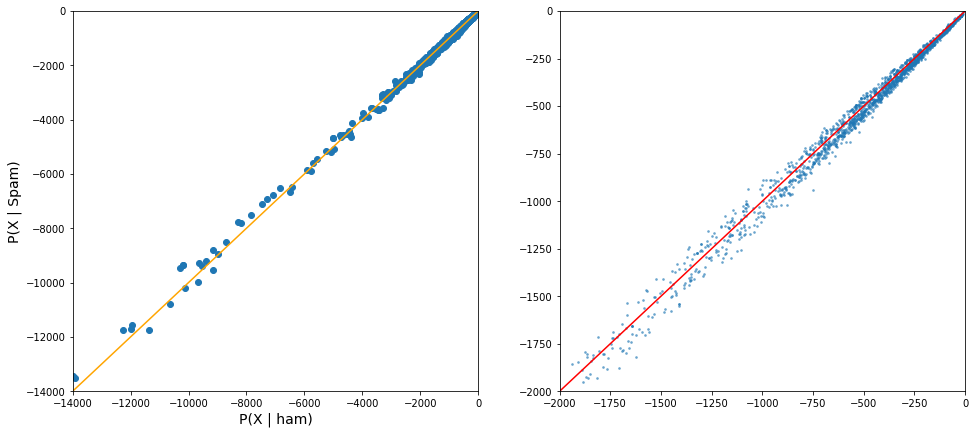

In [22]:
plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, size= 14)
plt.ylabel(yaxis_label, size= 14)

#set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam)
plt.plot(linedata, linedata, color= 'orange')

plt.xlabel(xaxis_label, size= 14)
plt.ylabel(yaxis_label, size= 14)

plt.subplot(1, 2, 2)

#set scale
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.scatter(joint_log_ham, joint_log_spam, alpha=0.5, s=3)
plt.plot(linedata, linedata, color= 'red')


plt.show()

In [23]:
# chart styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, labels: y_test})

C:\Users\samee\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


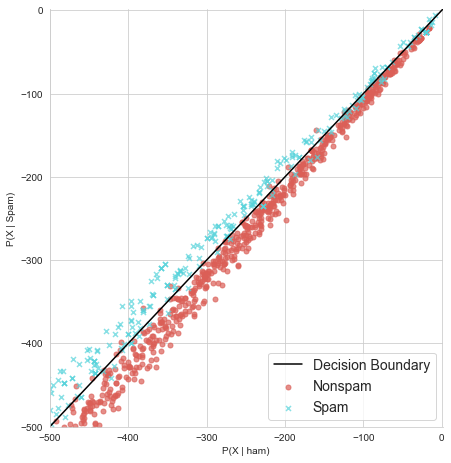

In [39]:
sns.lmplot(xaxis_label, yaxis_label, data= summary_df, size= 6.5, fit_reg=False,
          scatter_kws={'alpha': 0.7, 's': 25}, hue= labels, markers=['o', 'x'], palette='hls', legend= False)

plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(linedata, linedata, color= 'black')
plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize= 14)

plt.show()

### False Positives and False Negatives

In [41]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1177,  547], dtype=int64))

In [42]:
true_pos = (y_test == 1) & (prediction == 1)
true_pos.sum()

506

In [43]:
false_pos = (y_test == 0) & (prediction == 1)
false_pos.sum()

41

In [45]:
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

83

### Recall Score

In [48]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('Recall Score is {:.2%}'.format(recall_score))

Recall Score is 85.91%


## Precision Score

In [49]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision Score is {:.3%}'.format(precision_score))

Precision Score is 92.505%


## F- Score or F1- Score

In [50]:
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('f1 score is {:.2}'.format(f1_score))

f1 score is 0.89
